# Importing Libraries


In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

# Loading Data

In [2]:
df = pd.read_csv('D:/healthplusclinic/data/01-rawdata/rawdata.csv')


In [3]:
df.head(5)

,APPOINTMENT_ID,PATIENT_ID,PROVIDER_ID,APPOINTMENT_DATE,APPOINTMENT_TIME,LEAD_TIME_DAYS,WAIT_TIME_MINUTES,IS_NO_SHOW_0_1,AGE,INSURANCE_TYPE,SPECIALTY,PROVIDER_CLINIC_ID,CLINIC_ASSIGNMENT,CLINIC_NAME,CITY,HOURS_START,HOURS_END,SILVER_LOADED_AT
0,A0071090,P001027,PR00198,2024-01-07,12:15:00 PM,45,33.0,0,82,Private,Oncology,C007,Full-time,Oncology Clinic,Chicago,10:00:00.000,19:00:00.000,2026-02-20 03:46:41.088 -0800
1,A0074955,P000716,PR00002,2024-07-08,3:45:00 PM,21,19.0,0,19,Private,Neurology,C006,Full-time,Neurology Clinic,Chicago,08:00:00.000,18:00:00.000,2026-02-20 03:46:41.088 -0800
2,A0097350,P000507,PR00101,2024-01-16,10:15:00 AM,31,18.0,0,30,Private,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00.000,16:00:00.000,2026-02-20 03:46:41.088 -0800
3,A0036456,P001164,PR00010,2024-05-19,3:45:00 PM,12,29.0,0,18,Public,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00.000,16:00:00.000,2026-02-20 03:46:41.088 -0800
4,A0023637,P003837,PR00066,2025-03-26,3:15:00 PM,7,19.0,0,56,Public,Orthopedics,C003,Full-time,Orthopedic Clinic,Houston,09:00:00.000,17:00:00.000,2026-02-20 03:46:41.088 -0800


## Basic data info


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   APPOINTMENT_ID      120000 non-null  str    
 1   PATIENT_ID          120000 non-null  str    
 2   PROVIDER_ID         120000 non-null  str    
 3   APPOINTMENT_DATE    120000 non-null  str    
 4   APPOINTMENT_TIME    120000 non-null  str    
 5   LEAD_TIME_DAYS      120000 non-null  int64  
 6   WAIT_TIME_MINUTES   98656 non-null   float64
 7   IS_NO_SHOW_0_1      120000 non-null  int64  
 8   AGE                 120000 non-null  int64  
 9   INSURANCE_TYPE      120000 non-null  str    
 10  SPECIALTY           120000 non-null  str    
 11  PROVIDER_CLINIC_ID  120000 non-null  str    
 12  CLINIC_ASSIGNMENT   120000 non-null  str    
 13  CLINIC_NAME         120000 non-null  str    
 14  CITY                120000 non-null  str    
 15  HOURS_START         120000 non-null  str    


In [5]:
df.describe()

,LEAD_TIME_DAYS,WAIT_TIME_MINUTES,IS_NO_SHOW_0_1,AGE
count,120000.000000,98656.000000,120000.000000,120000.000000
mean,13.972800,21.280064,0.177867,42.710733
std,9.288269,10.643609,0.382402,23.410610
min,0.000000,0.000000,0.000000,0.000000
25%,7.000000,14.000000,0.000000,24.000000
50%,14.000000,21.000000,0.000000,43.000000
75%,20.000000,28.000000,0.000000,60.000000
max,63.000000,73.000000,1.000000,90.000000


## Data Cleaning


In [6]:
# Dropping last column of dataframe as it is not needed
df.drop('SILVER_LOADED_AT',axis=1, inplace=True)

In [7]:
df.head(5)

,APPOINTMENT_ID,PATIENT_ID,PROVIDER_ID,APPOINTMENT_DATE,APPOINTMENT_TIME,LEAD_TIME_DAYS,WAIT_TIME_MINUTES,IS_NO_SHOW_0_1,AGE,INSURANCE_TYPE,SPECIALTY,PROVIDER_CLINIC_ID,CLINIC_ASSIGNMENT,CLINIC_NAME,CITY,HOURS_START,HOURS_END
0,A0071090,P001027,PR00198,2024-01-07,12:15:00 PM,45,33.0,0,82,Private,Oncology,C007,Full-time,Oncology Clinic,Chicago,10:00:00.000,19:00:00.000
1,A0074955,P000716,PR00002,2024-07-08,3:45:00 PM,21,19.0,0,19,Private,Neurology,C006,Full-time,Neurology Clinic,Chicago,08:00:00.000,18:00:00.000
2,A0097350,P000507,PR00101,2024-01-16,10:15:00 AM,31,18.0,0,30,Private,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00.000,16:00:00.000
3,A0036456,P001164,PR00010,2024-05-19,3:45:00 PM,12,29.0,0,18,Public,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00.000,16:00:00.000
4,A0023637,P003837,PR00066,2025-03-26,3:15:00 PM,7,19.0,0,56,Public,Orthopedics,C003,Full-time,Orthopedic Clinic,Houston,09:00:00.000,17:00:00.000


In [8]:
# checking null values in datasets
df.isna().sum()

APPOINTMENT_ID            0
PATIENT_ID                0
PROVIDER_ID               0
APPOINTMENT_DATE          0
APPOINTMENT_TIME          0
LEAD_TIME_DAYS            0
WAIT_TIME_MINUTES     21344
IS_NO_SHOW_0_1            0
AGE                       0
INSURANCE_TYPE            0
SPECIALTY                 0
PROVIDER_CLINIC_ID        0
CLINIC_ASSIGNMENT         0
CLINIC_NAME               0
CITY                      0
HOURS_START               0
HOURS_END                 0
dtype: int64

In [9]:
null_wait_time_mins = df['WAIT_TIME_MINUTES'].isna().sum()
null_wait_time_mins_per = (null_wait_time_mins/df.shape[0])*100
print('Proportion of null in WAIT_TIME_MINUTES Column: ', null_wait_time_mins_per)

# the proportion on null is more tha 5% so we cannot drop these columns

Proportion of null in WAIT_TIME_MINUTES Column:  17.78666666666667


In [10]:
#checking duplicates in data
df[df.duplicated()]

,APPOINTMENT_ID,PATIENT_ID,PROVIDER_ID,APPOINTMENT_DATE,APPOINTMENT_TIME,LEAD_TIME_DAYS,WAIT_TIME_MINUTES,IS_NO_SHOW_0_1,AGE,INSURANCE_TYPE,SPECIALTY,PROVIDER_CLINIC_ID,CLINIC_ASSIGNMENT,CLINIC_NAME,CITY,HOURS_START,HOURS_END


<Axes: ylabel='WAIT_TIME_MINUTES'>

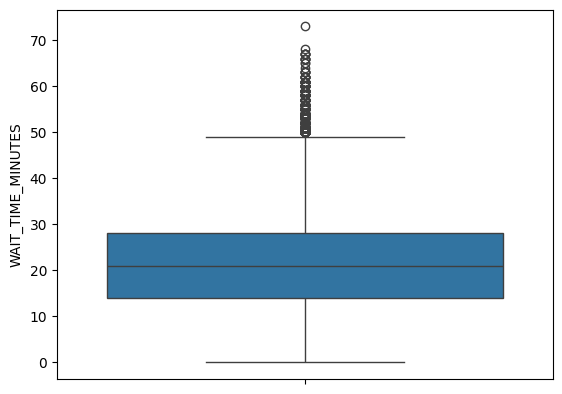

In [11]:
# checking outliters in wait minutes columns
sns.boxplot(data=df, y='WAIT_TIME_MINUTES')

In [12]:
# lowercasing all the columns name
df.columns = df.columns.str.lower()

In [13]:
df.head(5)

,appointment_id,patient_id,provider_id,appointment_date,appointment_time,lead_time_days,wait_time_minutes,is_no_show_0_1,age,insurance_type,specialty,provider_clinic_id,clinic_assignment,clinic_name,city,hours_start,hours_end
0,A0071090,P001027,PR00198,2024-01-07,12:15:00 PM,45,33.0,0,82,Private,Oncology,C007,Full-time,Oncology Clinic,Chicago,10:00:00.000,19:00:00.000
1,A0074955,P000716,PR00002,2024-07-08,3:45:00 PM,21,19.0,0,19,Private,Neurology,C006,Full-time,Neurology Clinic,Chicago,08:00:00.000,18:00:00.000
2,A0097350,P000507,PR00101,2024-01-16,10:15:00 AM,31,18.0,0,30,Private,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00.000,16:00:00.000
3,A0036456,P001164,PR00010,2024-05-19,3:45:00 PM,12,29.0,0,18,Public,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00.000,16:00:00.000
4,A0023637,P003837,PR00066,2025-03-26,3:15:00 PM,7,19.0,0,56,Public,Orthopedics,C003,Full-time,Orthopedic Clinic,Houston,09:00:00.000,17:00:00.000


### Data Type Conversion

In [14]:
print(df['wait_time_minutes'].dtypes)
df['wait_time_minutes']= pd.to_numeric(df['wait_time_minutes'], errors='coerce')
print(df['wait_time_minutes'].dtypes)
print(df['wait_time_minutes'].isna().sum())

float64
float64
21344


In [15]:
# Handling missing values in wait_time_minutes column by filling with median
df['wait_time_minutes'] = df['wait_time_minutes'].fillna(df['wait_time_minutes'].median())
print(df['wait_time_minutes'].dtypes)
print(df.info())

float64
<class 'pandas.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   appointment_id      120000 non-null  str    
 1   patient_id          120000 non-null  str    
 2   provider_id         120000 non-null  str    
 3   appointment_date    120000 non-null  str    
 4   appointment_time    120000 non-null  str    
 5   lead_time_days      120000 non-null  int64  
 6   wait_time_minutes   120000 non-null  float64
 7   is_no_show_0_1      120000 non-null  int64  
 8   age                 120000 non-null  int64  
 9   insurance_type      120000 non-null  str    
 10  specialty           120000 non-null  str    
 11  provider_clinic_id  120000 non-null  str    
 12  clinic_assignment   120000 non-null  str    
 13  clinic_name         120000 non-null  str    
 14  city                120000 non-null  str    
 15  hours_start         120000 non-null  

In [16]:
df.head()

,appointment_id,patient_id,provider_id,appointment_date,appointment_time,lead_time_days,wait_time_minutes,is_no_show_0_1,age,insurance_type,specialty,provider_clinic_id,clinic_assignment,clinic_name,city,hours_start,hours_end
0,A0071090,P001027,PR00198,2024-01-07,12:15:00 PM,45,33.0,0,82,Private,Oncology,C007,Full-time,Oncology Clinic,Chicago,10:00:00.000,19:00:00.000
1,A0074955,P000716,PR00002,2024-07-08,3:45:00 PM,21,19.0,0,19,Private,Neurology,C006,Full-time,Neurology Clinic,Chicago,08:00:00.000,18:00:00.000
2,A0097350,P000507,PR00101,2024-01-16,10:15:00 AM,31,18.0,0,30,Private,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00.000,16:00:00.000
3,A0036456,P001164,PR00010,2024-05-19,3:45:00 PM,12,29.0,0,18,Public,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00.000,16:00:00.000
4,A0023637,P003837,PR00066,2025-03-26,3:15:00 PM,7,19.0,0,56,Public,Orthopedics,C003,Full-time,Orthopedic Clinic,Houston,09:00:00.000,17:00:00.000


In [17]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])
print(df['appointment_date'].dtypes)

datetime64[us]


In [18]:
df['appointment_time'] = pd.to_datetime(df['appointment_time']).dt.time
df['hours_start'] = pd.to_datetime(df['hours_start']).dt.time
df['hours_end'] = pd.to_datetime(df['hours_end']).dt.time

C:\Users\SUBASH\AppData\Local\Temp\ipykernel_16324\226942769.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['appointment_time'] = pd.to_datetime(df['appointment_time']).dt.time
C:\Users\SUBASH\AppData\Local\Temp\ipykernel_16324\226942769.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hours_start'] = pd.to_datetime(df['hours_start']).dt.time
C:\Users\SUBASH\AppData\Local\Temp\ipykernel_16324\226942769.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hours_end'] = pd.to_datetime(df['hours_end']).dt.time


In [19]:
df.head()

,appointment_id,patient_id,provider_id,appointment_date,appointment_time,lead_time_days,wait_time_minutes,is_no_show_0_1,age,insurance_type,specialty,provider_clinic_id,clinic_assignment,clinic_name,city,hours_start,hours_end
0,A0071090,P001027,PR00198,2024-01-07,12:15:00,45,33.0,0,82,Private,Oncology,C007,Full-time,Oncology Clinic,Chicago,10:00:00,19:00:00
1,A0074955,P000716,PR00002,2024-07-08,15:45:00,21,19.0,0,19,Private,Neurology,C006,Full-time,Neurology Clinic,Chicago,08:00:00,18:00:00
2,A0097350,P000507,PR00101,2024-01-16,10:15:00,31,18.0,0,30,Private,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00,16:00:00
3,A0036456,P001164,PR00010,2024-05-19,15:45:00,12,29.0,0,18,Public,Pulmonology,C015,Full-time,Pulmonology Clinic,Houston,08:00:00,16:00:00
4,A0023637,P003837,PR00066,2025-03-26,15:15:00,7,19.0,0,56,Public,Orthopedics,C003,Full-time,Orthopedic Clinic,Houston,09:00:00,17:00:00


In [20]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   appointment_id      120000 non-null  str           
 1   patient_id          120000 non-null  str           
 2   provider_id         120000 non-null  str           
 3   appointment_date    120000 non-null  datetime64[us]
 4   appointment_time    120000 non-null  object        
 5   lead_time_days      120000 non-null  int64         
 6   wait_time_minutes   120000 non-null  float64       
 7   is_no_show_0_1      120000 non-null  int64         
 8   age                 120000 non-null  int64         
 9   insurance_type      120000 non-null  str           
 10  specialty           120000 non-null  str           
 11  provider_clinic_id  120000 non-null  str           
 12  clinic_assignment   120000 non-null  str           
 13  clinic_name         120000 non-null  str

# Handling Data Inconsistency

In [21]:
# defining custom function for make string lowercase in string column
def lower_case(cols):
    return cols.str.lower()

cat_col = df.select_dtypes('str').columns
print(cat_col)


Index(['appointment_id', 'patient_id', 'provider_id', 'insurance_type',
       'specialty', 'provider_clinic_id', 'clinic_assignment', 'clinic_name',
       'city'],
      dtype='str')


In [22]:
df[cat_col] = df[cat_col].apply(lower_case)

In [23]:
df.head()

,appointment_id,patient_id,provider_id,appointment_date,appointment_time,lead_time_days,wait_time_minutes,is_no_show_0_1,age,insurance_type,specialty,provider_clinic_id,clinic_assignment,clinic_name,city,hours_start,hours_end
0,a0071090,p001027,pr00198,2024-01-07,12:15:00,45,33.0,0,82,private,oncology,c007,full-time,oncology clinic,chicago,10:00:00,19:00:00
1,a0074955,p000716,pr00002,2024-07-08,15:45:00,21,19.0,0,19,private,neurology,c006,full-time,neurology clinic,chicago,08:00:00,18:00:00
2,a0097350,p000507,pr00101,2024-01-16,10:15:00,31,18.0,0,30,private,pulmonology,c015,full-time,pulmonology clinic,houston,08:00:00,16:00:00
3,a0036456,p001164,pr00010,2024-05-19,15:45:00,12,29.0,0,18,public,pulmonology,c015,full-time,pulmonology clinic,houston,08:00:00,16:00:00
4,a0023637,p003837,pr00066,2025-03-26,15:15:00,7,19.0,0,56,public,orthopedics,c003,full-time,orthopedic clinic,houston,09:00:00,17:00:00


In [24]:
print('Unique values in appointment_id: ',df['appointment_id'].nunique())
print('Unique values in patient: ',df['patient_id'].nunique())
print('Unique values in provider_id: ',df['provider_id'].nunique())
print('Unique values in insurance_type: ',df['insurance_type'].nunique())
print('Unique values in speciality: ',df['specialty'].nunique())
print('Unique values in clinic assignment: ',df['clinic_assignment'].nunique())
print('Unique values in clinic name: ',df['clinic_name'].nunique())
print('Unique values in city: ',df['city'].nunique())




Unique values in appointment_id:  120000
Unique values in patient:  5000
Unique values in provider_id:  220
Unique values in insurance_type:  3
Unique values in speciality:  15
Unique values in clinic assignment:  3
Unique values in clinic name:  15
Unique values in city:  5


In [25]:
# checking unique value in insurance type column
df['insurance_type'].unique()

<StringArray>
['private', 'public', 'self-pay']
Length: 3, dtype: str

In [26]:
# checking unique value in speciality type column
df['specialty'].unique()

<StringArray>
[               'oncology',               'neurology',
             'pulmonology',             'orthopedics',
         'family medicine',             'dermatology',
              'cardiology',                 'urology',
           'ophthalmology',               'dentistry',
 'obstetrics & gynecology',              'psychiatry',
           'endocrinology',          'otolaryngology',
        'gastroenterology']
Length: 15, dtype: str

In [27]:
# checking unique value in clinic_assignment type column
df['clinic_assignment'].unique()

<StringArray>
['full-time', 'rotating', 'part-time']
Length: 3, dtype: str

In [28]:
# checking unique value in city type column
df['city'].unique()

<StringArray>
['chicago', 'houston', 'new york', 'atlanta', 'los angeles']
Length: 5, dtype: str

# Data Exploration


Text(0.5, 1.0, 'Target Data Distribution')

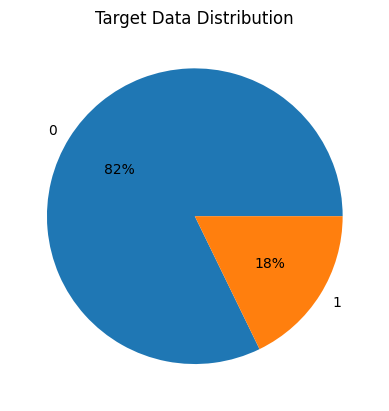

In [30]:
# Data distribution in target data
plt.Figure(figsize=(10,9))
plt.pie(df['is_no_show_0_1'].value_counts(), autopct='%.0f%%', labels=df['is_no_show_0_1'].value_counts().index)
plt.title("Target Data Distribution")